In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [3]:
# More imports
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, \
  preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
plt.style.use('ggplot')

In [3]:
# Data from: https://mmspg.epfl.ch/downloads/food-image-datasets/
# !wget --passive-ftp --prefer-family=ipv4 --ftp-user FoodImage@grebvm2.epfl.ch \
#  --ftp-password Cahc1moo -nc ftp://tremplin.epfl.ch/Food-5K.zip
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2021-02-06 00:55:05--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  4.25MB/s    in 3m 31s  

2021-02-06 00:58:36 (2.02 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [4]:
!unzip -qq -o Food-5K.zip

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is E4D8-AC1C

 Directory of C:\Users\ferna\Test\Tensorflow 2\Transfer Learning

02/06/2021  02:57 PM    <DIR>          .
02/06/2021  02:57 PM    <DIR>          ..
02/05/2021  10:59 PM    <DIR>          .ipynb_checkpoints
12/04/2019  03:48 PM    <DIR>          __MACOSX
09/15/2019  01:15 AM    <DIR>          Food-5K
02/04/2021  11:59 AM           420,523 TF2_0_Transfer_Learning.ipynb
02/06/2021  08:42 AM           536,833 TF2_0_Transfer_Learning_with_Data_Augmentation.ipynb
               2 File(s)        957,356 bytes
               5 Dir(s)  258,804,846,592 bytes free


In [8]:
ls Food-5K\training

 Volume in drive C has no label.
 Volume Serial Number is E4D8-AC1C

 Directory of C:\Users\ferna\Test\Tensorflow 2\Transfer Learning\Food-5K\training

09/15/2019  01:15 AM    <DIR>          .
09/15/2019  01:15 AM    <DIR>          ..
10/11/2016  08:01 AM             6,148 .DS_Store
10/10/2013  07:19 PM            91,259 0_0.jpg
09/12/2008  07:48 AM           213,056 0_1.jpg
09/13/2008  06:10 AM            51,145 0_10.jpg
09/13/2008  06:15 AM            37,564 0_100.jpg
10/10/2013  07:22 PM            59,530 0_1000.jpg
10/10/2013  07:22 PM           116,402 0_1001.jpg
10/10/2013  07:22 PM            89,901 0_1002.jpg
10/10/2013  07:22 PM            89,452 0_1003.jpg
10/10/2013  07:22 PM            57,524 0_1004.jpg
10/10/2013  07:22 PM           125,541 0_1005.jpg
10/10/2013  07:22 PM           120,102 0_1006.jpg
10/10/2013  07:22 PM            70,235 0_1007.jpg
10/10/2013  07:22 PM           147,708 0_1008.jpg
10/10/2013  07:22 PM            64,800 0_1009.jpg
09/13/2008  07:41 AM     

10/26/2015  05:50 PM           143,141 0_1236.jpg
08/14/2013  02:31 AM           150,160 0_1237.jpg
08/14/2013  03:11 AM           106,044 0_1238.jpg
08/14/2013  02:30 AM           181,579 0_1239.jpg
09/13/2008  07:07 AM           110,158 0_124.jpg
08/14/2013  02:34 AM            55,704 0_1240.jpg
08/14/2013  02:33 AM            41,271 0_1241.jpg
08/14/2013  02:34 AM            22,253 0_1242.jpg
08/14/2013  03:13 AM           182,756 0_1243.jpg
08/14/2013  02:28 AM           174,273 0_1244.jpg
08/14/2013  02:30 AM            69,400 0_1245.jpg
08/14/2013  03:11 AM            71,248 0_1246.jpg
04/29/2014  04:54 PM            40,818 0_1247.jpg
08/14/2013  02:34 AM            80,924 0_1248.jpg
08/14/2013  03:11 AM            88,474 0_1249.jpg
10/10/2013  07:19 PM           101,154 0_125.jpg
08/14/2013  02:33 AM           177,473 0_1250.jpg
08/14/2013  03:13 AM            85,720 0_1251.jpg
08/14/2013  02:34 AM           188,379 0_1252.jpg
08/14/2013  02:29 AM            84,957 0_1253.jpg
10

09/21/2013  04:42 AM            23,195 1_1329.jpg
09/21/2013  07:27 AM            42,082 1_133.jpg
09/21/2013  04:24 AM            62,031 1_1330.jpg
12/10/2015  05:13 AM            80,219 1_1331.jpg
09/21/2013  07:26 AM            63,249 1_1332.jpg
12/08/2015  09:44 AM            67,709 1_1333.jpg
09/21/2013  04:17 AM            27,010 1_1334.jpg
09/21/2013  04:46 AM            30,469 1_1335.jpg
09/21/2013  04:51 AM            48,115 1_1336.jpg
09/21/2013  04:31 AM            59,751 1_1337.jpg
09/21/2013  04:26 AM            46,218 1_1338.jpg
09/21/2013  04:22 AM            39,398 1_1339.jpg
09/21/2013  07:29 AM            65,382 1_134.jpg
09/21/2013  04:22 AM            29,544 1_1340.jpg
09/21/2013  04:19 AM            26,388 1_1341.jpg
09/21/2013  04:19 AM            59,800 1_1342.jpg
09/21/2013  04:19 AM            58,792 1_1343.jpg
09/21/2013  04:46 AM            62,899 1_1344.jpg
09/21/2013  04:51 AM            49,688 1_1345.jpg
09/21/2013  04:50 AM            34,211 1_1346.jpg
09

In [10]:
plt.imshow(image.load_img('0_525.jpg'))
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '0_525.jpg'

In [6]:
!ls Food-5K/training

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

In [7]:
!mv Food-5K/* .

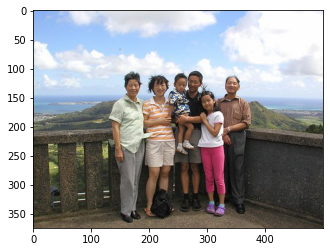

In [9]:
# look at an image for fun
plt.imshow(image.load_img('training/0_525.jpg'))
plt.show()

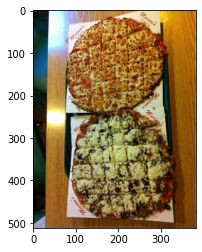

In [10]:
# Food images start with 1, non-food images start with 0
plt.imshow(image.load_img('training/1_616.jpg'))
plt.show()

In [11]:
!mkdir data

In [12]:
# Make directories to store the data Keras-style
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

In [13]:
# Move the images
# Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

In [14]:
train_path = 'data/train'
valid_path = 'data/test'

In [15]:
# These images are pretty big and of different sizes
# Let's load them all in as the same (smaller) size
IMAGE_SIZE = [200, 200]

In [16]:
# useful for getting number of files
# "glob" --> this will be helpful for determining the number of samples
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')    

In [20]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['data/train/food', 'data/train/nonfood']

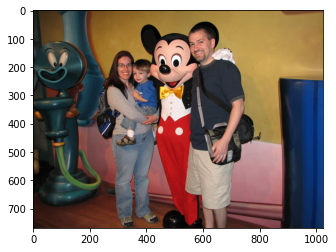

In [25]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [26]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [27]:
# freeze pretrained model weights
ptm.trainable = False    # when we call model that fit later these weights will not be changed by gradient

In [28]:
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded

K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [29]:
# create a model object
model = Model(inputs=ptm.input, outputs=x)

In [30]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [31]:
# create an instance of ImageDataGenerator
gen_train = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  preprocessing_function=preprocess_input
)

gen_test = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [32]:
batch_size = 128

# create generators
train_generator = gen_train.flow_from_directory(
  train_path,
  shuffle=True,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
valid_generator = gen_test.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
  validation_steps=int(np.ceil(len(valid_image_files) / batch_size)),
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - 57s 2s/step - loss: 3.6835 - accuracy: 0.8117 - val_loss: 0.4586 - val_accuracy: 0.9760
Epoch 2/10
24/24 [==============================] - 44s 2s/step - loss: 0.5055 - accuracy: 0.9776 - val_loss: 0.5290 - val_accuracy: 0.9800
Epoch 3/10
24/24 [==============================] - 45s 2s/step - loss: 0.3327 - accuracy: 0.9842 - val_loss: 0.5830 - val_accuracy: 0.9780
Epoch 4/10
24/24 [==============================] - 45s 2s/step - loss: 0.2979 - accuracy: 0.9879 - val_loss: 0.7154 - val_accuracy: 0.9790
Epoch 5/10
24/24 [==============================] - 45s 2s/step - loss: 0.2021 - accuracy: 0.9891 - val_loss: 0.6575 - val_accuracy: 0.9790
Epoch 6/10
24/24 [==============================] - 45s 2s/step - loss: 0.2238 - accuracy: 0.9885 - val_loss: 0.6483 - val_accuracy: 0.9810
Epoch 7/10
24/24 [==============================] - 45s 2s/step - loss: 0.3147 - accuracy: 0.9843 - val_loss: 0.5735 - val_accuracy: 0.9830
Epoch 8/10
24/24 [==

In [35]:
# create a 2nd train generator which does not use data augmentation
# to get the true train accuracy
train_generator2 = gen_test.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  batch_size=batch_size,
)
model.evaluate_generator(
    train_generator2,
    steps=int(np.ceil(len(image_files) / batch_size)))

Found 3000 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.04059088975191116, 0.996666669845581]

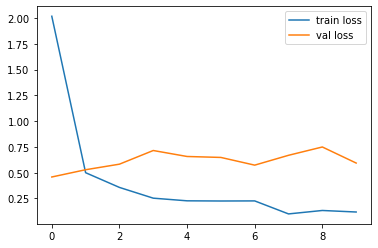

In [36]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

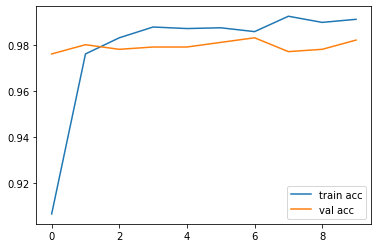

In [37]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()